# SOTI Challenge 2023

In [1]:
import functools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
# Read data
df_jobtitles = pd.read_csv("data/set1_jobtitles.csv")
df_characteristics = pd.read_csv("data/set2_characteristics.csv")
df_employment = pd.read_csv("data/set3_employment.csv")
df_dataviz = pd.read_csv("data/set4_dataviz.csv")
df_challenges = pd.read_csv("data/set5_challenges.csv")

datasets = [
    df_jobtitles,
    df_characteristics,
    df_employment,
    df_dataviz,
    df_challenges,
]

In [3]:
# Rename id and make index
for dataset in datasets:
    column = [c for c in dataset.columns if "set" in c and "_id" in c][0]
    dataset["id"] = dataset[column]
    # dataset.set_index("id", inplace=True)

In [4]:
# # Inner Join
# df = datasets[0]
# for dataset in datasets[1:]:
#     df = pd.merge(df, dataset, how="inner", on="id")
# df.head()
# # df = functools.reduce(
# #     datasets,
# #     lambda l, r: l.join(r)
# # )

# Initial Exploration

## 1. Job Titles

* `YearsDataVizExperience_buckets`: category
* OrgSector: need to combine, can have 0-many
* Time Spent:
    * `TimeWorked`: category
    * `TimeDataPrep`: category
    * `TimeDataAnalysis`: category
    * `TimeIdeating`: category
    * `TimeProducingViz`: category
    * `TimeManagingDataViz`: category
    * `TimeOtherVizTasks`: category

In [155]:
df = df_jobtitles.copy()
df = df[~df.id.isna()]
print(df.shape)
df.head(2)

(869, 19)


,set1_id,DataVizRoles_collapsed,JobTitle_cleaned__,YearsDataVizExperience_buckets,OrgSector_,OrgSector_Public,OrgSector_Private,OrgSector_Nonprofit,OrgSector_Academia,OrgSector_Other__,TimeWorked,TimeDataPrep,TimeDataAnalysis,TimeIdeating,TimeProducingViz,TimeManagingDataViz,TimeOtherVizTasks,OtherVizTasks__,id
0,WQOR,Employee,"Manager, Data and Products",11-15,1,x,[^not chosen],[^not chosen],[^not chosen],[^not chosen],41–50 hours,5 hours or less,None,5 hours or less,5 hours or less,More than 30 hours,None,[^not chosen],WQOR
1,RWeH,FreelanceAND,Data Visualization Designer,11-15,0,[\unasked],[\unasked],[\unasked],[\unasked],[\unasked],41–50 hours,5 hours or less,None,5 hours or less,5 hours or less,None,None,[^not chosen],RWeH


In [102]:
# df.JobTitle_cleaned__.unique()

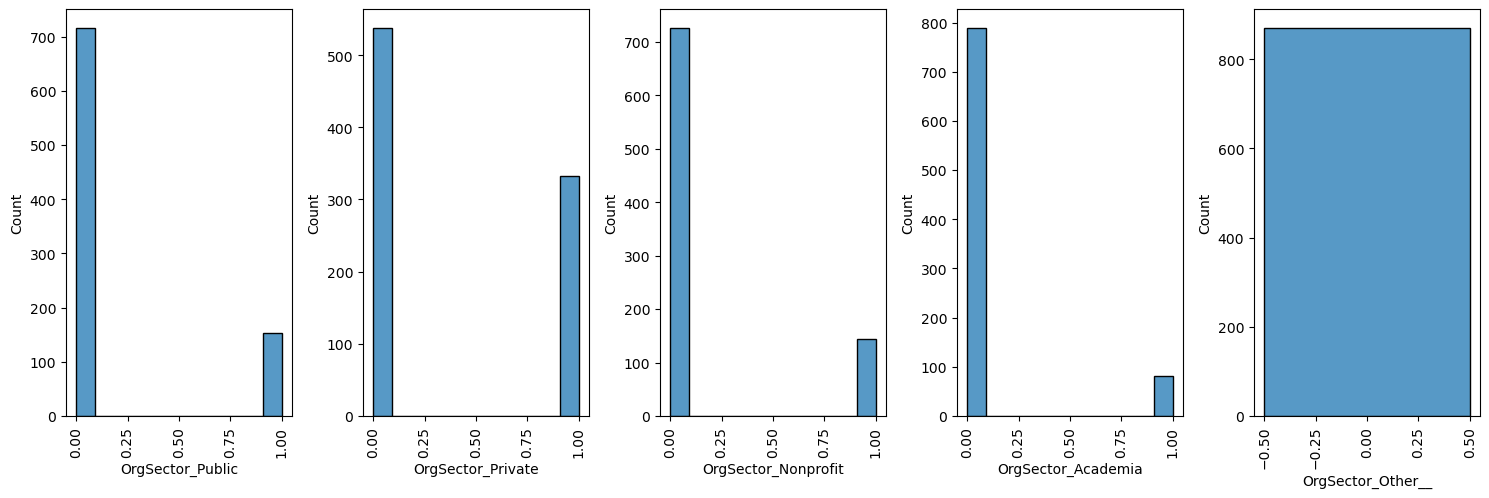

In [108]:
columns = [c for c in df.columns if "OrgSector_" in c and "OrgSector_" != c]

for c in columns:
    df[c] = df[c].map(lambda x: 1 if x == "x" else 0)
    
    
fig, axes = plt.subplots(1, len(columns), figsize=[15,5])
for i, c in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=df, x=c, ax=ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
fig.tight_layout()

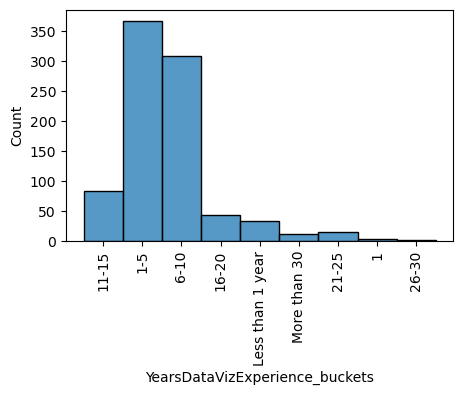

In [68]:
fig, ax = plt.subplots(figsize=[5,3])
sns.histplot(data=df, x="YearsDataVizExperience_buckets", ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

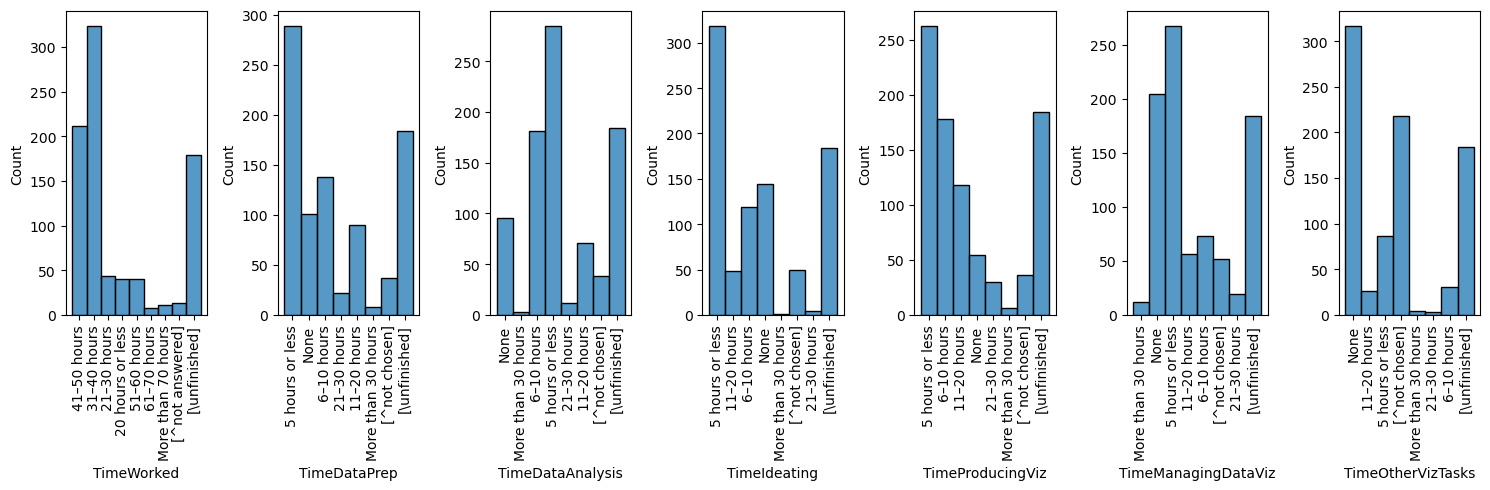

In [73]:
fig, axes = plt.subplots(1, 7, figsize=[15,5])
columns = [
    "TimeWorked",
    "TimeDataPrep",
    "TimeDataAnalysis",
    "TimeIdeating",
    "TimeProducingViz",
    "TimeManagingDataViz",
    "TimeOtherVizTasks",
]
for i, c in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=df, x=c, ax=ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
fig.tight_layout()

## 2. Characteristics

* Data Viz Roles: need to combine
* Work Site: recent v preferred
* Role as...(either freelance or employee)

In [161]:
df = df_characteristics.copy()
df = df[~df.id.isna()]
print(df.shape)
df.head(2)

(869, 69)


,set2_id,DataVizRoles_Freelance,DataVizRoles_Employee,DataVizRoles_Hobbyist,DataVizRoles_Student,DataVizRoles_Academic,DataVizRoles_PassiveIncome,DataVizRoles_PreferNot,WorkSituRecent,WorkSituPreferred,...,EducGradArea_Education,EducGradArea_HealthMed,EducGradArea_PublicSocialServices,EducGradArea_ScienceMathTech,EducGradArea_SocialSciences,EducGradArea_TradesPersonalServices,EducGradArea_MultiInterdisc,EducGradArea_Other__,DVSMembership,id
0,fnOJ,[^not chosen],x,x,[^not chosen],[^not chosen],[^not chosen],[^not chosen],Remote (fully or mostly),Remote (fully or mostly),...,[^not chosen],[^not chosen],[^not chosen],[^not chosen],x,[^not chosen],[^not chosen],[^not chosen],Yes,fnOJ
1,NHXk,[^not chosen],x,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],Remote (fully or mostly),Remote (fully or mostly),...,[^not chosen],[^not chosen],x,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],No,NHXk


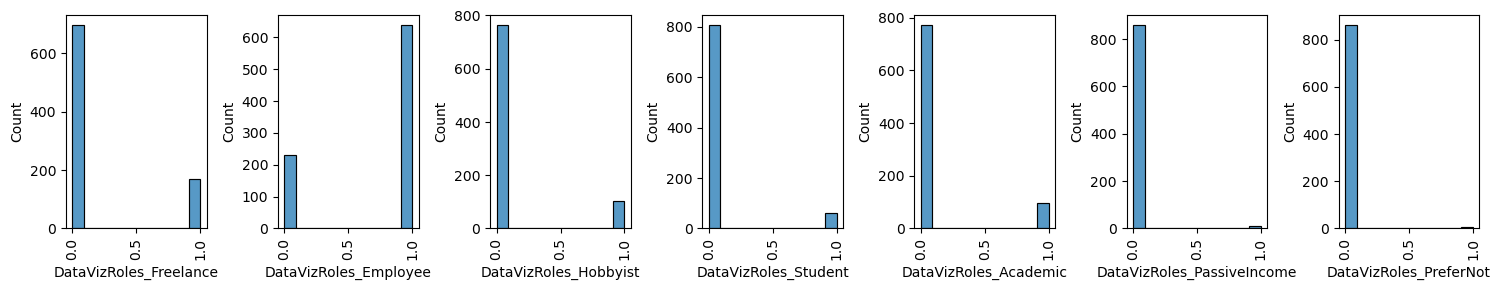

In [129]:
columns = [c for c in df.columns if "DataVizRoles_" in c]

for c in columns:
    df[c] = df[c].map(lambda x: 1 if x == "x" else 0)
    
fig, axes = plt.subplots(1, len(columns), figsize=[15,3])
for i, c in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=df, x=c, ax=ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
fig.tight_layout()

In [122]:
df.groupby("WorkSituRecent").count()
# df.groupby("WorkSituPreferred").count()

,set2_id,DataVizRoles_Freelance,DataVizRoles_Employee,DataVizRoles_Hobbyist,DataVizRoles_Student,DataVizRoles_Academic,DataVizRoles_PassiveIncome,DataVizRoles_PreferNot,WorkSituPreferred,RoleAsFreelance,...,EducGradArea_Business,EducGradArea_Education,EducGradArea_HealthMed,EducGradArea_PublicSocialServices,EducGradArea_ScienceMathTech,EducGradArea_SocialSciences,EducGradArea_TradesPersonalServices,EducGradArea_MultiInterdisc,EducGradArea_Other__,DVSMembership
WorkSituRecent,,,,,,,,,,,,,,,,,,,,,
Hybrid,285,285,285,285,285,285,285,285,285,285,...,285,285,285,285,285,285,285,285,285,285
"I'm in a graduate program for DataViz and so am not operating within industry standards, yet. In fact I'm unsure of what those are. What my hourly rate should be post-grad.",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Looking for a job,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
On site (fully or mostly),95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95
Parental leave,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Remote (fully or mostly),387,387,387,387,387,387,387,387,387,387,...,387,387,387,387,387,387,387,387,387,387
Self directed projects,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Work from my home office - did this before the pandemic too,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
[\unfinished],78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78


In [121]:
df.groupby("RoleAsFreelance").count()
# df.groupby("RoleAsEmployee").count()

,set2_id,DataVizRoles_Freelance,DataVizRoles_Employee,DataVizRoles_Hobbyist,DataVizRoles_Student,DataVizRoles_Academic,DataVizRoles_PassiveIncome,DataVizRoles_PreferNot,WorkSituRecent,WorkSituPreferred,...,EducGradArea_Business,EducGradArea_Education,EducGradArea_HealthMed,EducGradArea_PublicSocialServices,EducGradArea_ScienceMathTech,EducGradArea_SocialSciences,EducGradArea_TradesPersonalServices,EducGradArea_MultiInterdisc,EducGradArea_Other__,DVSMembership
RoleAsFreelance,,,,,,,,,,,,,,,,,,,,,
Analyst,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
Designer,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
Developer,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
Engineer,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Journalist,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
"Leadership (Manager, Director, VP, etc.)",9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
None of these describes my role,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
Scientist,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Teacher,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


<AxesSubplot: >

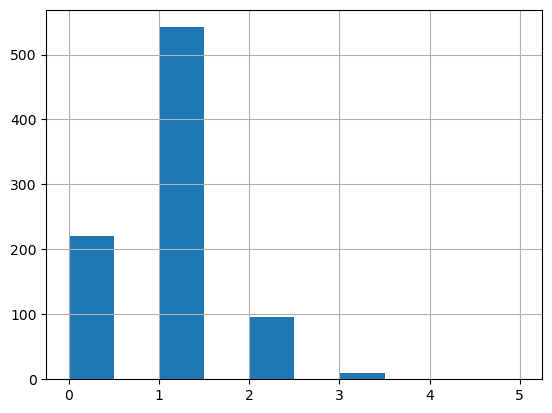

In [135]:
df.EducUndergradArea_.hist()

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 868
Data columns (total 69 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   set2_id                                   869 non-null    object
 1   DataVizRoles_Freelance                    869 non-null    object
 2   DataVizRoles_Employee                     869 non-null    object
 3   DataVizRoles_Hobbyist                     869 non-null    object
 4   DataVizRoles_Student                      869 non-null    object
 5   DataVizRoles_Academic                     869 non-null    object
 6   DataVizRoles_PassiveIncome                869 non-null    object
 7   DataVizRoles_PreferNot                    869 non-null    object
 8   WorkSituRecent                            868 non-null    object
 9   WorkSituPreferred                         869 non-null    object
 10  RoleAsFreelance                           869 non-

## 3. Employment

* gender
* role as employee
* years of experience
* org size
* org industry
* edu level

In [163]:
df = df_employment.copy()
df = df[~df.id.isna()]
print(df.shape)
df.head()

(869, 24)


,set3_id,DataVizRoles_collapsed,RoleAsFreelance,RoleAsEmployee,YearsDataVizExperience_buckets,PayCurrency_cleaned,PayAnnual,PayHourly,PayComparison,Loc1Country,...,OrgIndustry_Journalism,OrgIndustry_Marketing,OrgIndustry_ConsultantMulti,OrgIndustry_Other__,OrgSize,EmployChanged,EmployNewWanted,EducLevel,Gender_summarized,id
0,XcyB,Employee,[\unasked],Journalist,6-10,USD - United States Dollar,"$100,000 - $119,999",I am not compensated on an hourly or project b...,Somewhat higher,United States,...,x,x,x,[^not chosen],Fewer than 20 employees,No,No,Some college,Woman,XcyB
1,hhFu,Employee,[\unasked],Journalist,1-5,EUR - Euro Member Countries,"$10,000 - $19,999",[^not answered],Similar,Portugal,...,x,[^not chosen],[^not chosen],[^not chosen],100–499 employees,Yes,No,Bachelor’s degree,Woman,hhFu
2,BPSc,Academic,[\unasked],"Leadership (Manager, Director, VP, etc.)",Less than 1 year,CAD - Canada Dollar,"$120,000 - $139,999",I am not compensated on an hourly or project b...,Similar,Canada,...,x,x,[^not chosen],[^not chosen],Fewer than 20 employees,No,No,Master’s (or similar graduate degree),Man,BPSc
3,rQcf,Academic,[\unasked],"Leadership (Manager, Director, VP, etc.)",11-15,USD - United States Dollar,"$200,000 - $219,999",[^not answered],Somewhat lower,United States,...,x,[^not chosen],[^not chosen],[^not chosen],"5,000+ employees",No,No,Bachelor’s degree,Man,rQcf
4,eoGc,Student,[\unasked],Journalist,NaN,USD - United States Dollar,"$80,000 - $99,999",I am not compensated on an hourly or project b...,Similar,United States,...,x,[^not chosen],[^not chosen],[^not chosen],"5,000+ employees",No,Yes,Master’s (or similar graduate degree),Man,eoGc


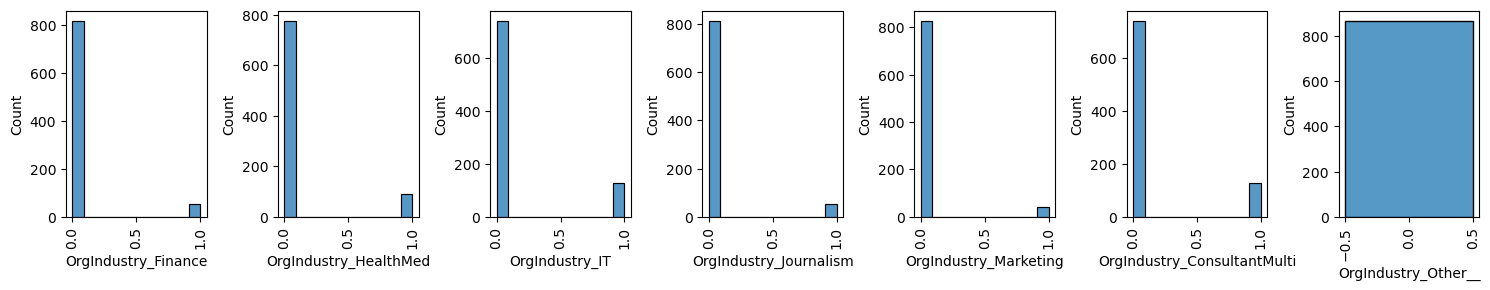

In [148]:
columns = [c for c in df.columns if "OrgIndustry_" in c and c != "OrgIndustry_"]

for c in columns:
    df[c] = df[c].map(lambda x: 1 if x == "x" else 0)
    
    
fig, axes = plt.subplots(1, len(columns), figsize=[15,3])
for i, c in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=df, x=c, ax=ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
fig.tight_layout()

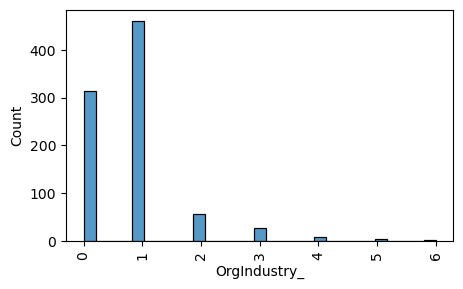

In [149]:
fig, ax = plt.subplots(figsize=[5,3])
sns.histplot(data=df, x="OrgIndustry_", ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

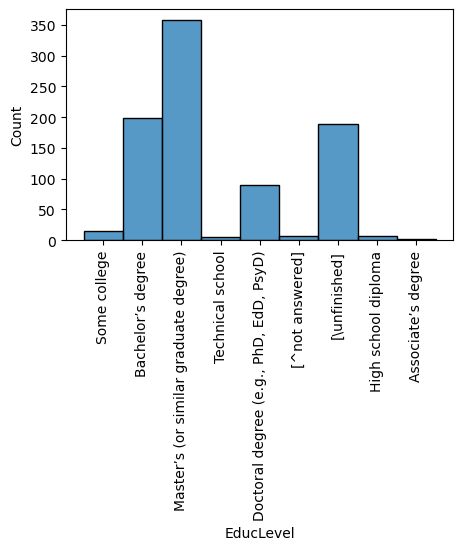

In [146]:
fig, ax = plt.subplots(figsize=[5,3])
sns.histplot(data=df, x="EducLevel", ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

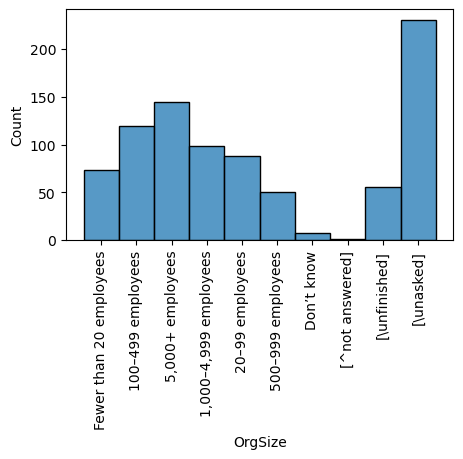

In [145]:
fig, ax = plt.subplots(figsize=[5,3])
sns.histplot(data=df, x="OrgSize", ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

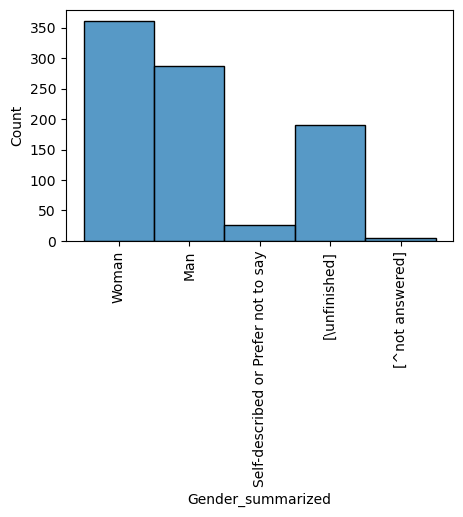

In [144]:
fig, ax = plt.subplots(figsize=[5,3])
sns.histplot(data=df, x="Gender_summarized", ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

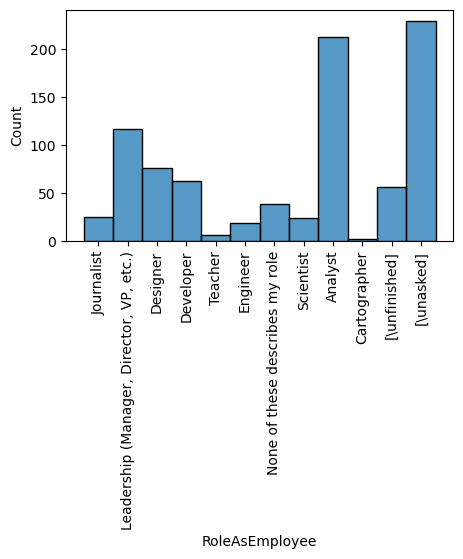

In [143]:
fig, ax = plt.subplots(figsize=[5,3])
sns.histplot(data=df, x="RoleAsEmployee", ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

## 4. Data Viz

* Make for who?
* What AI purpose?
* Tools used?
* Charts used?
* Org Sector?
* Org Size
* Problems

In [156]:
df = df_dataviz.copy()
df = df[~df.id.isna()]
print(df.shape)
df.head()

(869, 168)


,set4_id,DataVizRoles_collapsed,YearsDataVizExperience_buckets,DataVizCentralityFreelance,ToolsChoiceFreelance,ToolsUnchoiceProblemsFreelance_,ToolsUnchoiceProblemsFreelance_PoorCustomization,ToolsUnchoiceProblemsFreelance_MisfitForTask,ToolsUnchoiceProblemsFreelance_CostsAndOrLicenseIssues,ToolsUnchoiceProblemsFreelance_PerformanceIssues,...,DataVizSharingChannels_PeerReviewedJournal,DataVizSharingChannels_PrintedOnPaper,DataVizSharingChannels_OtherPhysicalMedium,DataVizSharingChannels_VRorAR,DataVizSharingChannels_Installation,DataVizSharingChannels_App,DataVizSharingChannels_Video,DataVizSharingChannels_SocialMedia,DataVizSharingChannels_Other__,id
0,URFe,Employee,1-5,[\unasked],[\unasked],0.0,[\unasked],[\unasked],[\unasked],[\unasked],...,x,[^not chosen],[^not chosen],x,[^not chosen],x,[^not chosen],[^not chosen],[^not chosen],URFe
1,aOWX,EmployeeANDFreelanceAND,6-10,Data visualization is an important secondary p...,I’m able to choose my own tools.,0.0,[\unasked],[\unasked],[\unasked],[\unasked],...,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],aOWX
2,ggnG,Freelance,6-10,[\unasked],[\unasked],0.0,[\unasked],[\unasked],[\unasked],[\unasked],...,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],ggnG
3,ATKe,FreelanceAND,16-20,[\unasked],[\unasked],0.0,[\unasked],[\unasked],[\unasked],[\unasked],...,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],ATKe
4,bDAh,Academic,6-10,[\unasked],[\unasked],0.0,[\unasked],[\unasked],[\unasked],[\unasked],...,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],x,[^not chosen],bDAh


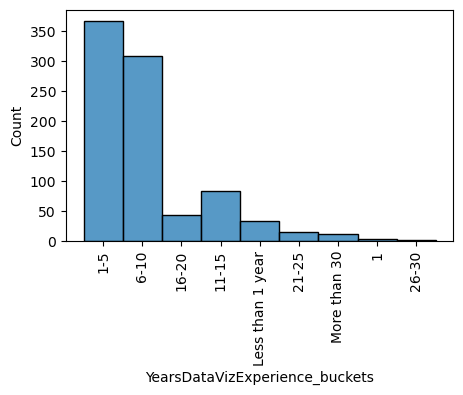

In [160]:
fig, ax = plt.subplots(figsize=[5,3])
sns.histplot(data=df, x="YearsDataVizExperience_buckets", ax=ax)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

## 5. Challenges


Challenges

44. How much does each of the following challenges impact your data visualization practice? `ChallengesImpact_*` significant, moderate, minor, no, (`ChallengesForDataViz_Other__` free text)
45. `EntryBarriers__` What current or recent barriers have you faced in getting into data visualization professionally? free text
46. `DataVizNotUnderstood__` What do you think people you work with just don’t get about the data visualization work that you do? free text

Looking Ahead

49. What area is your next priority for improving your data visualization skills? `TopDataVizSkillsToImprove` multiple choice  (allow unknown)
50. What methods do you find most helpful in learning new data visualization skills? `TopMethodsDataVizEduc_*` multiple select
54. How urgent do you believe it is for the data visualization community to address each of the following issues? `IssuesUrgency_*` somewhat, moderate, extremely, none

Time and Inspiration

58. Who do you find helpful for inspiration in data visualization? `DataVizGoTo_Persons__`
59. What resources do you find helpful for inspiration in data visualization (e.g., websites, organizations, podcasts, nature, etc.)? `DataVizGoTo_Resources__`

In [5]:
df = df_challenges.copy()
df = df[~df.id.isna()]
print(df.shape)
df.head()

(869, 64)


,set5_id,DataVizRoles_collapsed,YearsDataVizExperience_buckets,YearsWorkExperience_buckets,ChallengesImpact_,ChallengesImpact_LackTime,ChallengesImpact_LackDesignExpertise,ChallengesImpact_LackTechSkill,ChallengesImpact_LearningNewToolsEtc,ChallengesImpact_AccessingData,...,IssuesUrgency_DesignForDisabilities,IssuesUrgency_LackEducationAccess,IssuesUrgency_AlgorithmicBias,IssuesUrgency_LackEthicalStandards,IssuesUrgency_LackSoftwareLiteracy,IssuesUrgency_Other__,IssuesDataViz_Other__,DataVizGoTo_Persons__,DataVizGoTo_Resources__,id
0,iAtx,Academic,More than 30,More than 30,0.0,[\unfinished],[\unfinished],[\unfinished],[\unfinished],[\unfinished],...,[\unfinished],[\unfinished],[\unfinished],[\unfinished],[\unfinished],[\unfinished],[\unfinished],[\unfinished],[\unfinished],iAtx
1,XnKq,Employee,1-5,6-10,0.0,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],...,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[\unasked],[^not answered],[^not answered],XnKq
2,cScz,Employee,6-10,6-10,0.0,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],...,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[\unasked],James Round,[^not answered],cScz
3,unUH,EmployeeAND,1-5,1-5,0.0,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],...,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[\unasked],[^not answered],[^not answered],unUH
4,tsaA,EmployeeAND,6-10,26-30,0.0,No impact,No impact,No impact,No impact,No impact,...,NaN,NaN,NaN,NaN,NaN,NaN,[\unasked],Look,[\unfinished],tsaA


#### Challenges

In [13]:
df[df.ChallengesImpact_>0].shape

(700, 64)

#### Looking Ahead

In [20]:
# df.TopDataVizSkillsToImprove.unique()

In [17]:


df[(df.ChallengesImpact_>0)&(df.TopMethodsDataVizEduc_>0)&(df.TopDataVizSkillsToImprove!="[\\unfinished]")].shape

(681, 64)

#### Time and inspiration

In [11]:
# # People, specific organizations/publishers, generic tools and methods
# df.DataVizGoTo_Persons__.unique()

# generic tools, specific orgs/books
# df.DataVizGoTo_Resources__.unique()

# Plan

Dataset #5 

1. Select multiple `ChallengesImpact_` 
2. Select next priority `TopDataVizSkillsToImprove`
3. Show rank (top 3 of) `TopMethodsDataVizEduc_` 
4. Show Inspiration

Data:

* Step 1: 44. How much does each of the following challenges impact your data visualization practice? `ChallengesImpact_*` significant, moderate, minor, no, (ChallengesForDataViz_Other__ free text)
* Step 2: 49. What area is your next priority for improving your data visualization skills? `TopDataVizSkillsToImprove` multiple choice (allow unknown)
* Step 3:
    * 50. What methods do you find most helpful in learning new data visualization skills? `TopMethodsDataVizEduc_*` multiple select
    * 58. Who do you find helpful for inspiration in data visualization? `DataVizGoTo_Persons__`
    * 59. What resources do you find helpful for inspiration in data visualization (e.g., websites, organizations, podcasts, nature, etc.)? `DataVizGoTo_Resources__`

In [4]:
df = df_challenges.copy()
df = df[~df.id.isna()]
print(df.shape)
df.head()

(869, 64)


,set5_id,DataVizRoles_collapsed,YearsDataVizExperience_buckets,YearsWorkExperience_buckets,ChallengesImpact_,ChallengesImpact_LackTime,ChallengesImpact_LackDesignExpertise,ChallengesImpact_LackTechSkill,ChallengesImpact_LearningNewToolsEtc,ChallengesImpact_AccessingData,...,IssuesUrgency_DesignForDisabilities,IssuesUrgency_LackEducationAccess,IssuesUrgency_AlgorithmicBias,IssuesUrgency_LackEthicalStandards,IssuesUrgency_LackSoftwareLiteracy,IssuesUrgency_Other__,IssuesDataViz_Other__,DataVizGoTo_Persons__,DataVizGoTo_Resources__,id
0,iAtx,Academic,More than 30,More than 30,0.0,[\unfinished],[\unfinished],[\unfinished],[\unfinished],[\unfinished],...,[\unfinished],[\unfinished],[\unfinished],[\unfinished],[\unfinished],[\unfinished],[\unfinished],[\unfinished],[\unfinished],iAtx
1,XnKq,Employee,1-5,6-10,0.0,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],...,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[\unasked],[^not answered],[^not answered],XnKq
2,cScz,Employee,6-10,6-10,0.0,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],...,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[\unasked],James Round,[^not answered],cScz
3,unUH,EmployeeAND,1-5,1-5,0.0,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],...,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[\unasked],[^not answered],[^not answered],unUH
4,tsaA,EmployeeAND,6-10,26-30,0.0,No impact,No impact,No impact,No impact,No impact,...,NaN,NaN,NaN,NaN,NaN,NaN,[\unasked],Look,[\unfinished],tsaA


## Priorities: What area is your next priority for improving your data visualization skills?

Output: `priority`

In [5]:
priorities_list = [
    "Learning a new technical tool or library",
    "Improving my skills with an existing technical tool or library",
    "Improving my design skills",
    "Improving my data skills",
    "I don’t feel I need to improve my data visualization skills currently",
]
priorities_dict = {e: e for e in priorities_list}

map_priority = {
    "Building a portfolio": "Improving my skills with an existing technical tool or library",
    "Building a team": "Improving my communication or teamwork",
    "Documenting best-practice guidelines and a Data Viz Style guide for the organisation": "Improving my communication or teamwork",
    "Getting reps in producing my own work": "Improving my skills with an existing technical tool or library",
    "How to lead a data team in general": "Improving my communication or teamwork",
    "Impact of data viz on the business": "Improving my communication or teamwork",
    "Improving design and data skills": "Improving my design skills",
    "Improving my business communication skills": "Improving my communication or teamwork",
    "Incorpirating equity into design": "Improving my design skills",
    "Incorporate AI in my workflow": "Learning a new technical tool or library",
    "Knowledge transfer, sharing data viz skills with colleagues.": "Improving my communication or teamwork",
    "Leadership and communication buyin": "Improving my communication or teamwork",
    "Need to find better visualizations tools. I tried A LOT of them but they all have strong limitations in my opinion.": "Learning a new technical tool or library",
    "Other (please specify and use semicolons (;) to separate distinct items)": "Unknown",
    "Presentation skills": "Improving my communication or teamwork",
    "Streamlining the workflow from data to visualization. I work with large volumes of data and need to be efficient in moving from data collection to communication of findings.": "Improving my communication or teamwork",
    "ability to write": "Improving my communication or teamwork",
    "completing my tableau certificaton": "Improving my skills with an existing technical tool or library",
    "learning more syntax language, e.g. R, D3,": "Improving my skills with an existing technical tool or library",
}
priorities_dict.update(map_priority)

df["priority"] = df.TopDataVizSkillsToImprove.map(lambda x: priorities_dict.get(x, "Unknown"))

df.groupby(["priority"]).count()

,set5_id,DataVizRoles_collapsed,YearsDataVizExperience_buckets,YearsWorkExperience_buckets,ChallengesImpact_,ChallengesImpact_LackTime,ChallengesImpact_LackDesignExpertise,ChallengesImpact_LackTechSkill,ChallengesImpact_LearningNewToolsEtc,ChallengesImpact_AccessingData,...,IssuesUrgency_DesignForDisabilities,IssuesUrgency_LackEducationAccess,IssuesUrgency_AlgorithmicBias,IssuesUrgency_LackEthicalStandards,IssuesUrgency_LackSoftwareLiteracy,IssuesUrgency_Other__,IssuesDataViz_Other__,DataVizGoTo_Persons__,DataVizGoTo_Resources__,id
priority,,,,,,,,,,,,,,,,,,,,,
I don’t feel I need to improve my data visualization skills currently,30,30,30,30,30,30,30,30,30,30,...,27,20,22,24,22,20,30,30,30,30
Improving my communication or teamwork,10,10,10,10,10,10,10,10,10,10,...,9,8,9,9,9,6,10,10,10,10
Improving my data skills,101,101,101,101,101,101,101,101,101,101,...,98,93,91,93,95,69,101,101,101,101
Improving my design skills,161,161,159,159,161,161,161,161,161,161,...,153,146,141,152,140,105,161,159,161,161
Improving my skills with an existing technical tool or library,170,170,169,168,170,170,170,170,170,170,...,162,157,153,156,154,123,170,170,170,170
Learning a new technical tool or library,222,222,221,221,222,222,222,222,222,222,...,212,200,197,204,199,141,222,222,222,222
Unknown,175,175,174,174,175,175,175,175,175,175,...,175,175,175,175,175,175,175,175,175,175


<AxesSubplot: xlabel='ChallengesImpact_', ylabel='Percent'>

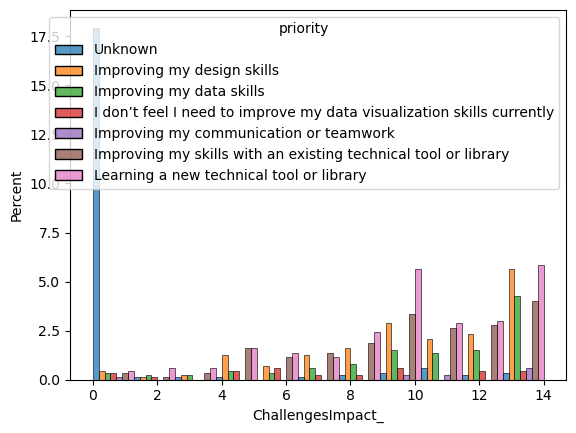

In [6]:
sns.histplot(x="ChallengesImpact_", hue="priority", data=df, stat="percent", multiple="dodge")

# df.groupby(["priority"]).ChallengesImpact_()

## Challenges

In [7]:
col_challenges = [
    'ChallengesImpact_LackTime',
    'ChallengesImpact_LackDesignExpertise',
    'ChallengesImpact_LackTechSkill',
    'ChallengesImpact_LearningNewToolsEtc',
    'ChallengesImpact_AccessingData',
    'ChallengesImpact_InfoOverload',
    'ChallengesImpact_LackCollaboration',
    'ChallengesImpact_LackMentorship',
    'ChallengesImpact_LowDataLiteracy',
    'ChallengesImpact_DataVizNotRespected',
    'ChallengesImpact_ToolsTechLimits',
    'ChallengesImpact_NonVizActivity',
    'ChallengesImpact_DataVolume',
]
mapping_challenges = {
    "No impact": 0,
    "Minor impact": 0.33,
    "Moderate impact": 0.67,
    "Significant impact": 1.0,
}

for challenge in col_challenges:
    challenge_name = challenge[17:].lower()
    # df[f"challenge_{challenge_name}"] = df[challenge].map(lambda x: 1 if x in ['Minor impact', 'Moderate impact', 'Significant impact'] else 0)
    df[f"challenge_{challenge_name}"] = df[challenge].map(lambda x: mapping_challenges.get(x, 0))
    df[f"challenge_category_{challenge_name}"] = df[challenge].map(lambda x: x if x in ['No impact', 'Minor impact', 'Moderate impact', 'Significant impact'] else "Did not answer")

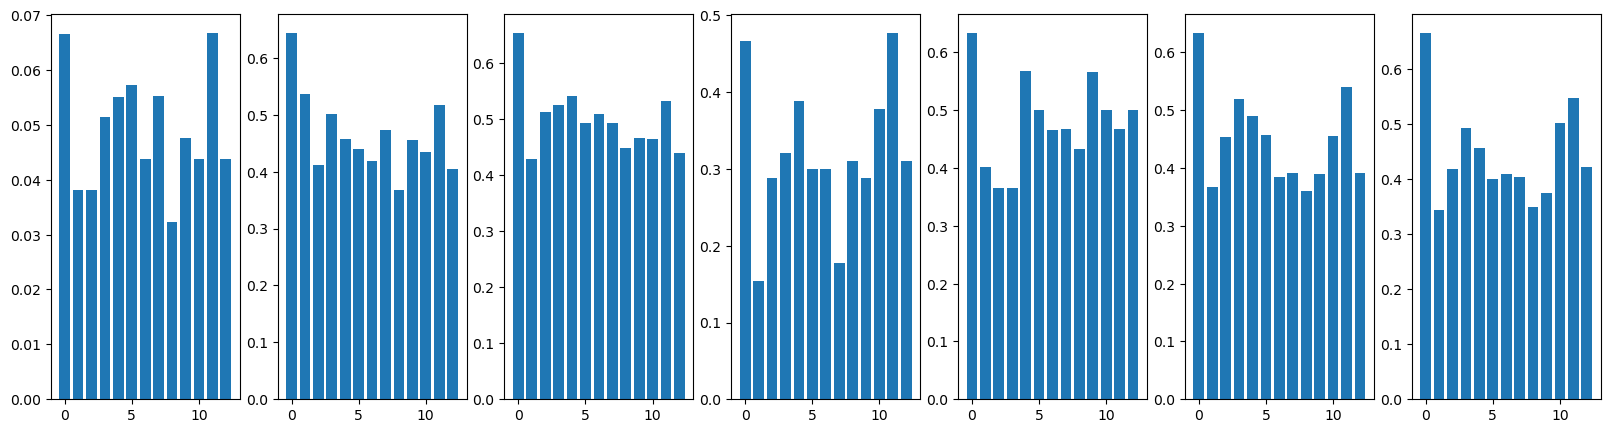

In [8]:
fig, axes = plt.subplots(1, 7, figsize=[20, 5])
pl = list(df.priority.unique())
ccc = [
    'lacktime',
    'lackdesignexpertise',
    'lacktechskill',
    'learningnewtoolsetc',
    'accessingdata',
    'infooverload',
    'lackcollaboration',
    'lackmentorship',
    'lowdataliteracy',
    'dataviznotrespected',
    'toolstechlimits',
    'nonvizactivity',
    'datavolume',
]

for i in range(7):
    ax = axes[i]
    p = pl[i]
    
    agg = []
    tmp = df[(df.priority==p)]
    for j, c in enumerate(ccc):
        # agg.append((j, tmp[(tmp[f"challenge_{c}"]==1)&(tmp[f"challenge_category_{c}"]=="Significant impact")].shape[0]))
        agg.append((j, tmp[f"challenge_{c}"].mean()))
    t = pd.DataFrame(agg, columns=["x","y"])
    ax.bar(t.x, t.y)

## Recommendations

In [9]:
# * 50. What methods do you find most helpful in learning new data visualization skills? `TopMethodsDataVizEduc_*` multiple select
#     * 58. Who do you find helpful for inspiration in data visualization? `DataVizGoTo_Persons__`
#     * 59. What resources do you find helpful for inspiration in data visualization (e.g., websites, organizations, podcasts, nature, etc.)? `DataVizGoTo_Resources__`

In [10]:
df[(~df.DataVizGoTo_Persons__.fillna("").str.contains("unfinished"))&(~df.DataVizGoTo_Persons__.fillna("").str.contains("not answered"))].DataVizGoTo_Persons__

2                                            James Round
4                                                   Look
12     Andy Cotgreave; Amanda Makulec; Jeffrey Shaffe...
18                                        Jennifer Dawes
169                                          Simon Scarr
                             ...                        
861    Federica Fragapane's tutorials are extremely h...
863                              Data Vis Dispatch, IIBA
864    Infographic, reports from multinational platfo...
865                                  Stephanie Evergreen
867             Dr Stephanie Evergreen; Dr Nicole Bowman
Name: DataVizGoTo_Persons__, Length: 322, dtype: object

## Words

In [11]:
words = pd.read_csv("data/words.csv")
# words = words[["id", "Resource", "Resource Type"]]
words.columns = ["id", "resource", "resource_type"]
words.drop_duplicates(inplace=True)
words.head(2)

,id,resource,resource_type
0,WraL,Loka,Person
1,WraL,Pen Plot Art,Person


In [38]:
words_dict = {}

for i, r in words.iterrows():
    index = r[0]
    value = words_dict.get(index, [])
    value.append(r[1])
    words_dict[index] = value

## Export

In [39]:
output_columns = [
    "id",
    "priority",
] + [
    c for c in df.columns if "challenge_" in c
] + [
    "DataVizGoTo_Persons__",
    "DataVizGoTo_Resources__",
]

In [40]:
pl = list(df.priority.unique())
pl_mapping = {
    "Unknown": "Unknown",
    "Improving my design skills": "Design Skills",
    "Improving my data skills": "Data Skills",
    "I don’t feel I need to improve my data visualization skills currently": "None",
    "Improving my communication or teamwork": "Communication",
    "Improving my skills with an existing technical tool or library": "Existing Tools",
    "Learning a new technical tool or library": "New Tools",
}
export_json = []

ccc = [
    'lacktime',
    'lackdesignexpertise',
    'lacktechskill',
    'learningnewtoolsetc',
    'accessingdata',
    'infooverload',
    'lackcollaboration',
    'lackmentorship',
    'lowdataliteracy',
    'dataviznotrespected',
    'toolstechlimits',
    'nonvizactivity',
    'datavolume',
]

for p in pl:
    export_json.append(
        {
            "id": p.lower().replace(" ", "-").replace("’",""),
            "priority": p,
            "priorityShort": pl_mapping[p],
            "n": df[df.priority==p].shape[0],
            "data": [
                {
                    "id": r.id,
                    "n": df[df.priority==p].shape[0],
                    "challenge": c,
                    "category": r[f"challenge_category_{c}"],
                    "score": r[f"challenge_{c}"],
                    "words": words_dict.get(r.id, []),
                } for i, r in df[(df.priority==p)&(df[f"challenge_category_{c}"]!="Did not answer")].iterrows() for c in ccc
            ]
        }
    )

In [24]:
import json 
   
# Convert and write JSON object to file
with open("data/data.json", "w") as outfile: 
    json.dump(export_json, outfile)